# Linear Regression

This is a case study, showcasing how to implement univariate linear regression (with one variable) to predict profits for a restaurant franchise.

## Importing the libraries

In [468]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
import locale

sns.set_style('darkgrid',{
            'xtick.labelsize': .5,
            'ytick.labelsize': .5,
            'font.family':'serif',
            'axes.grid': True,
            })
locale.setlocale(locale.LC_ALL, 'en_us')

%matplotlib inline

## Problem Statement

Suppose a CEO of a restaurant franchise is considering different cities for opening a new outlet. In order to expand his business, he would like cities that give higher profits. The chain already has data for profits and population from its restaurants in various cities.

The goal is to build a Linear Regression model that predicts the highest profit according to the population.  

## Load the Data

Firstly, we want to load and inspect the data

In [469]:
def load_data_df():
    df = pd.read_csv("data.txt", names=['Population of City in 10,000s','Profit in $10,000'], sep=',')
    return df

# Spliting the data and convert them to numpy arrays
x_train, y_train = df['Population of City in 10,000s'].to_numpy(), df['Profit in $10,000'].to_numpy()

print ('The shape of x_train is:', x_train.shape)           # Checking the dimensions of the x dataset
print ('The shape of y_train is: ', y_train.shape)          # Checking the dimensions of the y dataset

# Checking the first elements of the x dataset
print(f"First five elements of x_train are: {', '.join([str(i) for i in x_train[:5]])}") 
# Checking the first elements of the y dataset
print(f"First five elements of y_train are: {', '.join([str(i) for i in y_train[:5]])}")

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
First five elements of x_train are: 6.1101, 5.5277, 8.5186, 7.0032, 5.8598
First five elements of y_train are: 17.592, 9.1302, 13.662, 11.854000000000001, 6.8233


## Variables

#### x_train

`x_train` is a 1D array with datapoints that represent the population of a city, where each datapoint represent the city population times 10,000.
`m` is the number of training examples and is equal to the length of `x_train`, which is 97.

#### y_train

`y_train` is a 1D array with datapoints that represent the restaurant's average monthly profits in each city, in units of \$10,000. A negative value for profit indicates a loss.

## Visualizing the data

It is often useful to understand the data by visualizing it. The scatter plot is very useful for understanding the data, since the dataset has only two properties (profit and population).

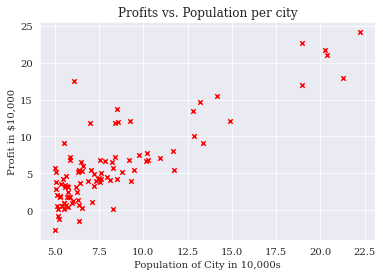

In [470]:
df = load_data_df()
ax = df.plot(kind    = 'scatter',                                
             x       = 'Population of City in 10,000s',
             y       = 'Profit in $10,000',
             color   = 'red',
             marker  = 'x',
             title   = 'Profits vs. Population per city')

x_train, y_train = df['Population of City in 10,000s'], df['Profit in $10,000']

## The Linear Regression Model

#### Model prediction function

The model prediction ($f$ or $\hat{y}$) for univariate linear regression for an example $x^{(i)}$ with parameters $w$ (slope) and $b$ (intercept), is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

$f$ is a function that takes $x$ (city population) as input and depending on the values of $w$ and $b$, <br>
will output some value of a prediction $\hat{y}$ (the restaurant's monthly profit for that city)


#### Cost function
The cost function for univariate linear regression $J(w,b)$ which is known as the Least Squares cost function, is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

$m$ is the number of training examples in the dataset

#### Gradient Descent
The pseudocode for the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaneously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) 
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
$$

#### Goal
The goal of Linear Regression is to minimize the Cost function using Gradient Descent. By implementing the Gradient Descent algorithm the values of the parameters $(w,b)$ gradually get a smaller.<br>
Also by using batch gradient descent, the calculations will be done to all the examples in one iteration.

In [471]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    
    m = x.shape[0]                          # number of training examples 
    f = np.dot(w, x) + b                    # calculating the y_hat (model prediction)
    total_cost = 1/(2*m)*sum((f - y)**2)    # calculating the total cost

    return total_cost

In [472]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    m = x.shape[0]                    # Number of training examples
    f = np.dot(w, x) + b              # calculating the y_hat (model prediction)
    dj_dw = (f - y) * x               # calculating the gradient of the cost function (J) with respect to w
    dj_db = (f - y)                   # calculating the gradient of the cost function (J) with respect to b
    dj_dw = 1/m * sum(dj_dw)          # calculating the total dj/dw
    dj_db = 1/m * sum(dj_db)          # calculating the total dj/db
    
    return dj_dw, dj_db

In [473]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    m = len(x)     # number of training examples
    J_history = [] # An array to store cost J at each iteration for graphing purposes
    w = w_in       # Initializing the w parameter
    b = b_in       # Initializing the b parameter
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)                            # Calculate the gradient and update the parameters
        w = w - alpha * dj_dw                                                   # Update parameters w               
        b = b - alpha * dj_db                                                   # Update parameters b

        if i < 100000:                                                          # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)                                   # calculate the cost
            J_history.append(cost)                                              # Save cost J at each iteration
            
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")         # Print cost at intervals 10 times or as many iterations if < 10
        
    return w, b

In [474]:
initial_w = 0.      # Initializing the w parameter
initial_b = 0.      # Initializing the b parameter
iterations = 1500   # Setting the number of iterations for gradient descent
alpha = 0.01        # Setting the learning rate for gradient descent

w,b = gradient_descent(x_train,
                       y_train,
                       initial_w,
                       initial_b, 
                       compute_cost,
                       compute_gradient,
                       alpha,
                       iterations)

print(f"w:{round(w,2)},b:{round(b, 2)}")

Iteration    0: Cost     6.74
Iteration  150: Cost     5.31
Iteration  300: Cost     4.96
Iteration  450: Cost     4.76
Iteration  600: Cost     4.64
Iteration  750: Cost     4.57
Iteration  900: Cost     4.53
Iteration 1050: Cost     4.51
Iteration 1200: Cost     4.50
Iteration 1350: Cost     4.49
w:1.17,b:-3.63


## Plotting the predicted Line

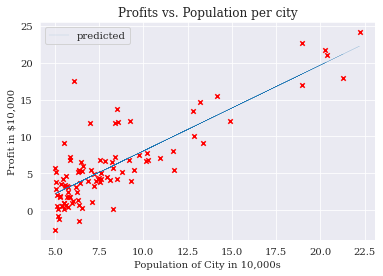

In [483]:
df['predicted'] = pd.Series([w * x_train[i] + b for i in range(x_train.shape[0])]) # Add the predicted line to the DataFrame

ax = df.plot(kind    = 'scatter',                                # Scatter plot
             x       = 'Population of City in 10,000s',          # Specify the x-axis
             y       = 'Profit in $10,000',                      # Specify the x-axis
             color   = 'red',                                    # Color them red
             marker  = 'x',                                      # Make them the shape of 'x'
             title   = 'Profits vs. Population per city')        # Add title

df.plot(ax=ax,x='Population of City in 10,000s',y='predicted', lw='.1') # Plot the LR line
plt.show()                                                              # Show the plot

## Predicting the new values

The values of $w,b$ can also be used to make predictions on profits.

In [484]:
def predict(input,w,b):
    """
    Takes an input, that represent the population times 10.000
    and returns the profit
    Args:
        input: (float) the number of population times 10.000
        w: (float) parameters w of the model
        b: (float) parameters b of the model
    Returns:
    None
    """
    population = locale.format_string('%.0f', input * 10000, True)
    prediction = (w * input + b) * 10000
    print(f"For population = {population}, we predict a profit of ${locale.format_string('%.2f', prediction, True)}")

In [485]:
predict(3.5,w,b)  # Prediction of the profit for 35,500 people
predict(3.75,w,b) # Prediction of the profit for 37,500 people
predict(7.,w,b)   # Prediction of the profit for 70,000 people

For population = 35,000, we predict a profit of $4,519.77
For population = 37,500, we predict a profit of $7,435.67
For population = 70,000, we predict a profit of $45,342.45


## Sci-kit learn Implementation

In this section we'll solve the same problem using the sci-kit learn library

In [486]:
from sklearn.linear_model import LinearRegression

first_line = df['predicted'].copy()     # Copies the previous LR line
df         = load_data_df()             # Loads the data

# Split data and convert them to numpy arrays
x_train, y_train = df['Population of City in 10,000s'].to_numpy(), df['Profit in $10,000'].to_numpy()

reg = LinearRegression()                                            # Initiate the LinearRegression model
reg.fit(x_train.reshape(-1, 1),y_train)                             # Fitting the line on the data
reg.score(x_train.reshape(-1, 1), y_train)                          # Calculating the accuracy

0.7020315537841397

The accuracy of the model is 70%

## Prediction
We can use the `predict` fuction to predict results of the profit

In [487]:
w_2 = float(reg.coef_)      # Retrieve w (slope) from reg and convert to a float
b_2 = float(reg.intercept_) # Retrieve b (intercept) from reg and convert to a float

predict(3.5, w_2, b_2)  # Prediction of the profit for 35,500 people
predict(3.75, w_2, b_2) # Prediction of the profit for 37,500 people
predict(7., w_2, b_2)   # Prediction of the profit for 70,000 people

For population = 35,000, we predict a profit of $2,798.37
For population = 37,500, we predict a profit of $5,780.95
For population = 70,000, we predict a profit of $44,554.55


or use the built-in `predict` function of the model

In [489]:
input_pop  = 3.5                                                   # Input value for 35,000 people
population = locale.format_string('%.0f', input_pop * 10000, True) # Calculating the population
prediction = reg.predict(np.array([[input_pop]]))[0]*10000         # Calculating the prediction

print(f"For population = {population}, we predict a profit of ${locale.format_string('%.2f', prediction, True)}")

For population = 35,000, we predict a profit of $2,798.37


## Visualizing the results

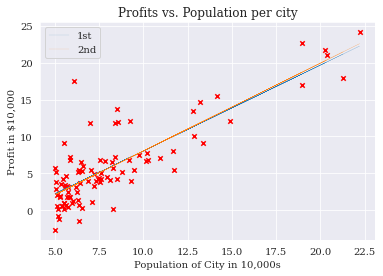

In [490]:
f = np.dot(w_2, x_train) + b_2      # Calculating f
f = f.flatten()                     # Flatten f to be 1D
df['skl_linear'] = pd.Series(f)     # Add the LR line to the DataFrame
df['previous line'] = first_line    # Add the previous line to the DataFrame

ax = df.plot(kind    = 'scatter',                                # Scatter plot
             x       = 'Population of City in 10,000s',          # Specify the x-axis
             y       = 'Profit in $10,000',                      # Specify the x-axis
             color   = 'red',                                    # Color them red
             marker  = 'x',                                      # Make them the shape of 'x'
             title   = 'Profits vs. Population per city')        # Add title

df.plot(ax=ax,x='Population of City in 10,000s',y='previous line', lw='.1', label='1st') # Add the first LR line
df.plot(ax=ax,x='Population of City in 10,000s',y='skl_linear', lw='.1', label='2nd')    # Add the new LR line
plt.show()                                                                               # Show results

## Using Stochastic Gradient Descent

By using the scikit learn's `SGDRegressor` model, the gradient of the loss function is estimated each sample at a time <br>
and so the model is updated along the way with a decreasing strength schedule. <br> 
Also, it contains more hyperparameters than the `LinearRegression` model, so tuning the model becomes easier.

In [491]:
from sklearn.linear_model import SGDRegressor

first_line  = df['previous line'].copy()     # Copies the first LR line
second_line = df['skl_linear'].copy()        # Copies the previous LR line

In [418]:
df = load_data_df()                                                # Loads the data

# Spliting the data and convert them to numpy arrays
x_train, y_train = df['Population of City in 10,000s'].to_numpy(), df['Profit in $10,000'].to_numpy()

reg = SGDRegressor(alpha=0.01, max_iter=1500)                      # Initiating the SGDRegressor model
reg.fit(x_train.reshape(-1, 1), y_train)                           # Fitting the line
reg.score(x_train.reshape(-1, 1), y_train)                         # Calculating the accuracy

0.6652594205892732

The result has less accuracy from the previous model

## Prediction

In [429]:
predict(3.5,reg.coef_,reg.intercept_) # Prediction of the profits for 35,000 people

For population = 35,000, we predict a profit of $18,295.08


## Visualizing

In [420]:
f = np.dot(w_2, x_train) + b_2      # Calculating f
f = f.flatten()                     # Flatten f to be 1D
df['skl_SGR'] = pd.Series(f)        # Add the new LR line to the DataFrame 

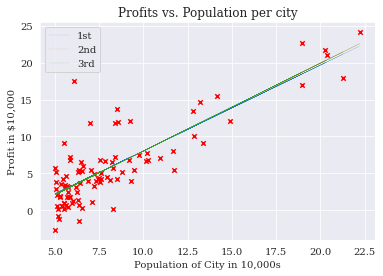

In [421]:
df['skl_linear'] = second_line   # Add the LR line to the DataFrame
df['previous line'] = first_line    # Add the previous line to the DataFrame

ax = df.plot(kind    = 'scatter',                                # Scatter plot
             x       = 'Population of City in 10,000s',          # Specify the x-axis
             y       = 'Profit in $10,000',                      # Specify the x-axis
             color   = 'red',                                    # Color them red
             marker  = 'x',                                      # Make them the shape of 'x'
             title   = 'Profits vs. Population per city')        # Add title

df.plot(ax=ax,x='Population of City in 10,000s',y='previous line', lw='.1', label='1st') # Add the first LR line
df.plot(ax=ax,x='Population of City in 10,000s',y='skl_linear', lw='.1', label='2nd')    # Add the second LR line
df.plot(ax=ax,x='Population of City in 10,000s',y='skl_SGR', lw='.1', label='3rd')       # Add the new LR line
plt.show()                                                                               # Show results

## Train - Test 

For having less unbiased result, the data must be split into two sets:
- `x_train`,`y_train`, which contains the data used for training
- `x_test`,`y_test`, which contains the data used for cross-validating the results

For this task the `train_test_split` from `sklearn.model_selection` is used.

In [422]:
from sklearn.model_selection import train_test_split

test_df = load_data_df()                                                   # Loads the data

# Split the data and convert them to numpy arrays
X, y = test_df['Population of City in 10,000s'].to_numpy(), test_df['Profit in $10,000'].to_numpy()

# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,                     # Use the X (training examples)
                                                    y ,                    # Use the y (labels)
                                                    random_state=200,      # Give more concistent results
                                                    test_size=0.25,        # Split into 75-25 %
                                                    shuffle=True)          # Shuffle the data
reg = SGDRegressor(alpha=0.01, max_iter=1500)                              # Use the SGDRegressor model
reg.fit(X_train.reshape(-1, 1), y_train)                                   # Fitting the line
reg.score(X_test.reshape(-1, 1), y_test)                                   # Calculating the accuracy

0.7743366614991651

This model has accuracy of 77%

In [423]:
w_2 = float(reg.coef_)                  # Retrieve w (slope) from reg and convert to a float
b_2 = float(reg.intercept_)             # Retrieve b (intercept) from reg and convert to a float
f = np.dot(w_2, x_train) + b_2          # Calculate f
f = f.flatten()                         # Flatten f to be 1D

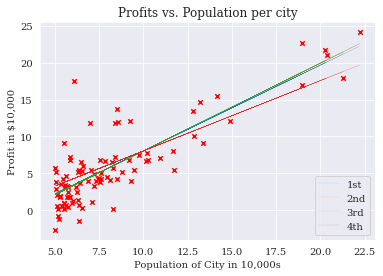

In [428]:
df['new_line']      = pd.Series(f)
df['previous line'] = first_line          # Copies the first LR line
df['skl_linear'] = second_reg_line     # Copies the previous LR line

ax = df.plot(kind    = 'scatter',                                # Scatter plot
             x       = 'Population of City in 10,000s',          # Specify the x-axis
             y       = 'Profit in $10,000',                      # Specify the x-axis
             color   = 'red',                                    # Color them red
             marker  = 'x',                                      # Make them the shape of 'x'
             title   = 'Profits vs. Population per city')        # Add title

df.plot(ax=ax,x='Population of City in 10,000s',y='previous line', lw='.1', label='1st') # Add the first LR line
df.plot(ax=ax,x='Population of City in 10,000s',y='skl_linear', lw='.1', label='2nd')    # Add the second LR line
df.plot(ax=ax,x='Population of City in 10,000s',y='skl_SGR', lw='.1', label='3rd')       # Add the third LR line
df.plot(ax=ax,x='Population of City in 10,000s',y='new_line', lw='.1', label='4th')      # Add the new LR line
plt.show()                                                                               # Show results

In [425]:
input_pop  = 3.5 
population = locale.format_string('%.0f', input_pop * 10000, True)
prediction = reg.predict(np.array([[input_pop]]))[0]*10000

print(f"For population = {population}, we predict a profit of ${locale.format_string('%.2f', prediction, True)}")

For population = 35,000, we predict a profit of $18,295.08


In [426]:
predict(3.5,w_2,b_2)

For population = 35,000, we predict a profit of $18,295.08


So the 4th model with the highest accuracy shows that the profit for a city with 35,000 people will be in the amount of $18,295.08